<a href="https://colab.research.google.com/github/kavyajeetbora/ML_algorithms/blob/master/clustering/01_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Clustering

Clustering is a fundamental technique in unsupervised machine learning used to group similar data points together. Here are some common clustering methods:

1. **K-Means Clustering**: This algorithm partitions the data into K clusters, where each data point belongs to the cluster with the nearest mean. It's simple and efficient but requires specifying the number of clusters in advance1.

2. **Hierarchical Clustering**: This method builds a hierarchy of clusters either by merging smaller clusters into larger ones (agglomerative) or by splitting larger clusters into smaller ones (divisive). It doesn't require specifying the number of clusters beforehand2.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: DBSCAN groups data points that are closely packed together, marking points in low-density regions as outliers. It's effective for discovering clusters of arbitrary shape and handling noise


## Why Clustering is Required
1. **Pattern Recognition**: Clustering helps in identifying patterns and structures in data without any prior labels.
2.**Data Simplification**: It simplifies large datasets by grouping similar data points together, making it easier to analyze and interpret.
3. **Anomaly Detection**: Clustering can identify outliers or anomalies in the data, which is useful in fraud detection and quality control.
4. **Data Exploration**: It aids in exploratory data analysis by uncovering hidden insights and relationships within the data.


Here is a notebook on clutering problem, how it was implemented to unsupervised clustering of data on the customer's records from a groceries firm's database:

[Customer Segmentation: Clustering 🛍️🛒🛒](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering)

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Create Dataset


**Problem Statement:**

Health Insurance: Insurance companies use clustering to identify groups of consumers with similar health insurance usage patterns. This helps in designing better insurance plans and managing risk

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for a real-life scenario: Health Insurance
n_samples = 10000

# Features: Age, Annual Income (k$), Number of Claims, Health Score (1-100), Number of Dependents
age = np.random.randint(18, 70, n_samples)
annual_income = np.random.randint(15, 150, n_samples)
number_of_claims = np.random.randint(0, 10, n_samples)
health_score = np.random.randint(1, 100, n_samples)
number_of_dependents = np.random.randint(0, 5, n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Number of Claims': number_of_claims,
    'Health Score (1-100)': health_score,
    'Number of Dependents': number_of_dependents
})

df.sample(5)

,Age,Annual Income (k$),Number of Claims,Health Score (1-100),Number of Dependents
9101,59,125,8,44,1
6730,46,34,8,61,3
9705,33,50,6,10,4
8060,54,23,4,71,1
2455,51,38,6,12,3


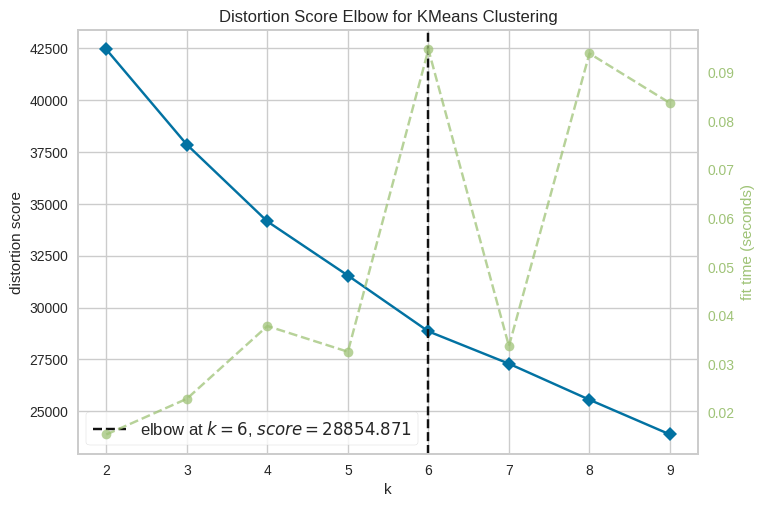

   Age  Annual Income (k$)  Number of Claims  Health Score (1-100)  \
0   56                  38                 3                    33   
1   69                  79                 9                    31   
2   46                  32                 1                    36   
3   32                  58                 2                    87   
4   60                  90                 4                    89   

   Number of Dependents  cluster  
0                     0        2  
1                     1        2  
2                     1        4  
3                     2        4  
4                     1        4  


In [15]:


# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Find optimal k using the Elbow method
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(scaled_features)
visualizer.show()
plt.show()

# Get the optimal k value from the Elbow method
optimal_k = visualizer.elbow_value_

# Perform k-means clustering with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Print the resulting DataFrame
print(df.head())

Let's discuss the theory behind the elbow method. The plot above shows the inertia (or distortion) score as a function of \( k \). The inertia is also called the within-cluster sum of squares (WCSS). Given a set of points \( \${x_1, x_2, \ldots, x_n\}$ \) with a mean value of \( \mu \) in a cluster \( C \), the WCSS is defined as

$$
\text{WCSS} = \sum_{i=1}^{n} (x_i - \mu)^2
$$

The inertia for a given value of \( k \) is then simply the sum of the WCSS of all clusters. As can be seen from the equation, it is analogous to the mean-squared error in regression analysis, and so we want to minimize this value. However, there is also a problem of overfitting. If we plot the inertia vs \( k \), for cases where the clusters are well-separated, we will see a point after which the value of the inertia decreases linearly or even becomes constant. After this point, we don't gain much information, albeit the inertia is still decreasing. This point is called the elbow point and it locates the optimal value of \( k \).

For our case above, it seems that the elbow point is located at \( k=6 \). However, as you might already notice, one weakness of this method is that it is quite subjective, especially if the clusters are not well-separated (which seems to be our case).

## Silhouette Score

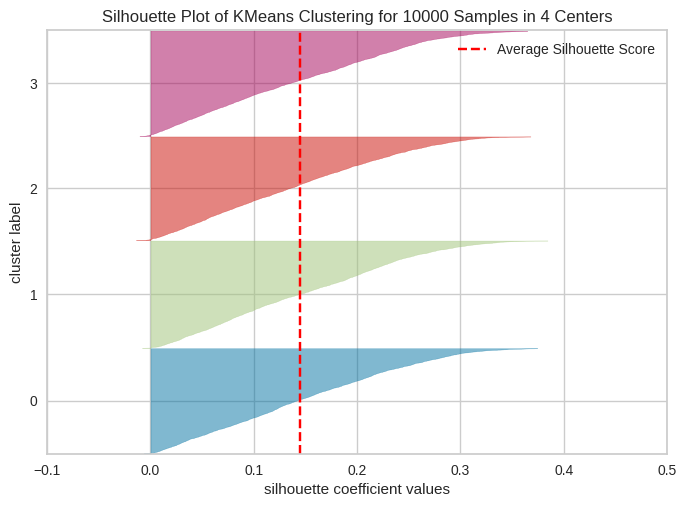

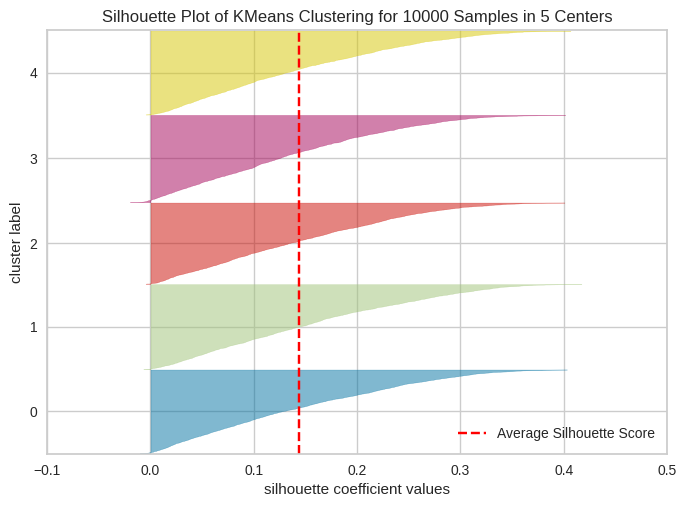

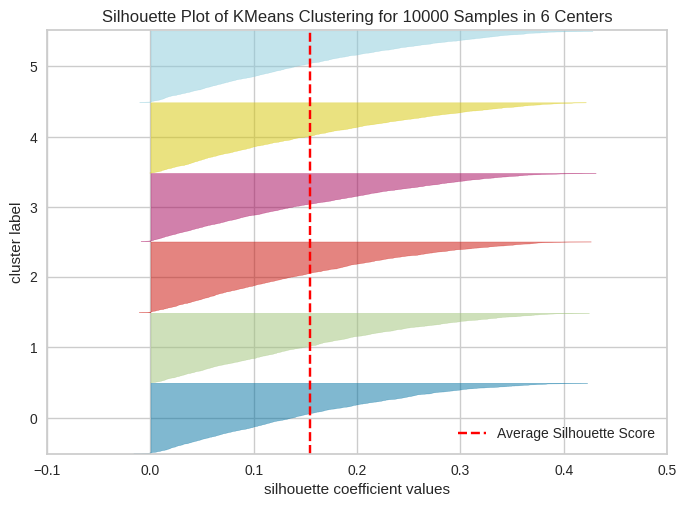

In [16]:
# Instantiate the clustering model and visualizer
for i in [4,5,6]:
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit the data to the visualizer
    visualizer.fit(scaled_features)
    visualizer.show()

Let's briefly discuss what the silhouette score is. For a given point $i$, the silhouette score of that point is defined by

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*N3Xm52bELqrju_DWLqjyHg.jpeg" height=350/>

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where $a(i)$, sometimes called the cohesion, is the mean of the distance between point $i$ and every other point in the same cluster (intra-cluster distance). If $a(i)$ is small, then the cluster size is small, implying they are bound together very strongly.

On the other hand, $b(i)$, sometimes called the separation, is the mean of the distance between point $i$ and all points belonging to the nearest cluster to the cluster where $i$ belongs (nearest-cluster distance). If $b(i)$ is large, then the cluster where $i$ belongs and the nearest-neighboring cluster are far apart, implying the clusters are well-separated.

By the definition above, we can consider two extreme cases:

- If $a(i)$ is much smaller than $b(i)$, the score is close to $+1$, and the nearest cluster is much more distant than the cluster size, indicating the two clusters are very separated.
- If $a(i)$ is much larger than $b(i)$, the score is close to $-1$, and the cluster size is much larger than the distance to the nearest-neighboring cluster, indicating the two clusters are mixed together.

Therefore, the silhouette score falls between the range of [-1, 1]. A score close to $+1$ indicates the sample is far from the nearest neighboring cluster, which is good. And a value close to $-1$ indicates the sample may be incorrectly assigned to the wrong cluster, which is bad.

The plot above shows the silhouette score for each point in the cluster in increasing order. The horizontal axis gives the silhouette coefficient (or silhouette score). The vertical axis gives the cluster member. In other words, the thickness indicates how many members there are in each cluster. The dashed vertical red line indicates the average silhouette score of all points in the dataset.

To determine the best value of $k$, we have to consider two factors. First, we want the average silhouette coefficient to be as large as possible, while still being smaller than the maximum score of every cluster member, i.e., they are inside the colored triangles. Second, we also want the thickness of each cluster to be similar to each other, indicating similar composition in every cluster.

From the two considerations above, it looks like $k = 5$ is the most optimal number of clusters, since the average score is still inside the silhouette plots and the thicknesses are similar for every cluster. However, we have to consider the average silhouette score. Let's plot the average score as a function of $k$, similar to the elbow method above (the elbow method uses inertia/distortion as its y-value).


<div style="background-color: #807F7F; padding: 10px; border-radius: 5px;">
  <h3>💡 Steps to Calculate Cohesion \( a(i) \) for Silhouette Score</h3>
  <ul>
    <li><strong>Calculate Intra-Cluster Distance for Each Point:</strong>
      <ul>
        <li>For each point in the cluster, calculate the distance to every other point in the same cluster.</li>
        <li>Compute the average of these distances for each point.</li>
      </ul>
    </li>
    <li><strong>Example with 10 Points:</strong>
      <ul>
        <li>For point 1, calculate the distance to points 2, 3, ..., 10, and then take the average of these 9 distances.</li>
        <li>Repeat this process for points 2, 3, ..., 10.</li>
      </ul>
    </li>
    <li><strong>Overall Cohesion:</strong>
      <ul>
        <li>You will end up with 10 average distances (one for each point).</li>
        <li>The cohesion parameter \( a(i) \) for each point \( i \) is simply the average distance calculated in the first step.</li>
      </ul>
    </li>
  </ul>
</div>


<div style="background-color: #807F7F; padding: 10px; border-radius: 5px;">
  <h3>💡 Steps to Calculate Separation \( b(i) \) for Silhouette Score</h3>
  <ul>
    <li><strong>Identify the Nearest Cluster:</strong>
      <ul>
        <li>For each point in cluster A, identify the nearest cluster (in this case, cluster B).</li>
      </ul>
    </li>
    <li><strong>Calculate Inter-Cluster Distance for Each Point:</strong>
      <ul>
        <li>For point 1 in cluster A, calculate the distance to every point in cluster B.</li>
        <li>Compute the average of these distances. This average distance is the separation \( b(i) \) for point 1.</li>
      </ul>
    </li>
    <li><strong>Repeat for All Points in Cluster A:</strong>
      <ul>
        <li>Repeat the process for points 2, 3, ..., up to the last point in cluster A.</li>
        <li>For each point in cluster A, calculate the average distance to all points in cluster B to get the separation \( b(i) \).</li>
      </ul>
    </li>
  </ul>
</div>



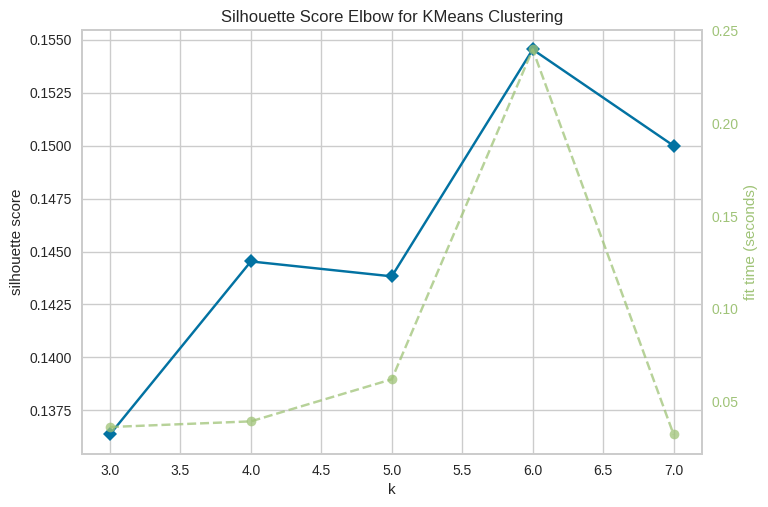

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(3,8), metric='silhouette', timings=True, locate_elbow=False
)

visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()

### Silhoutte Score Interference

The highest score is achieved at `k=6`, which is higher than the score at k=5. The fact that k=6 captures an additional cluster with very few members, i.e. cluster 4 in the silhouette plot above, may indicate there is a group of outlying customers. Therefore, we will use k=6 as our benchmark model, and we will analyze the characteristics of each cluster later on.

Another remark, the fact that the maximum score is only around `+0.18` indicates the clusters are mixed together, and the separation is not clear at all. This is expected since there is no sign of multimodality in any of the features. We can visualize the clustering by reducing the dimension of the data into just 2-dimension using PCA

In [18]:
from sklearn.decomposition import PCA

# Visualize the segmentation along 2 principal axes (using PCA)
def plot_clusters(df, k_value):
    kmeans = KMeans(n_clusters=k_value,random_state=7)
    kmeans.fit(df)

    # Visualization with PCA
    pca = PCA(n_components=2)
    pca.fit(df)
    pcs = pca.transform(df)

    # Store to a new dataframe
    df_lrfmc_pca = pd.DataFrame(data=pcs,columns=['PC1','PC2'])
    df_lrfmc_pca['cluster'] = kmeans.labels_

    # Visualization
    plt.figure(figsize=(10,6))

    # Color for each cluster
    color_list = ['red','blue','green','orange','purple','pink']
    color_list = color_list[:k_value]

    for i in range(len(df_lrfmc_pca['cluster'].unique())):
        df_dummy = df_lrfmc_pca[df_lrfmc_pca['cluster']==i]
        plt.scatter(df_dummy['PC1'],df_dummy['PC2'],c=color_list[i],s=5,label=f'Cluster {i}')
        # Centroid positions
        plt.scatter(df_dummy['PC1'].mean(),df_dummy['PC2'].mean(),c=color_list[i],marker='X',edgecolor='k',s=250,zorder=10)

    plt.legend()
    plt.title(f'Segmentation for {k_value} clusters')
    plt.xlabel('PC1',fontsize=14)
    plt.ylabel('PC2',fontsize=14)

    return

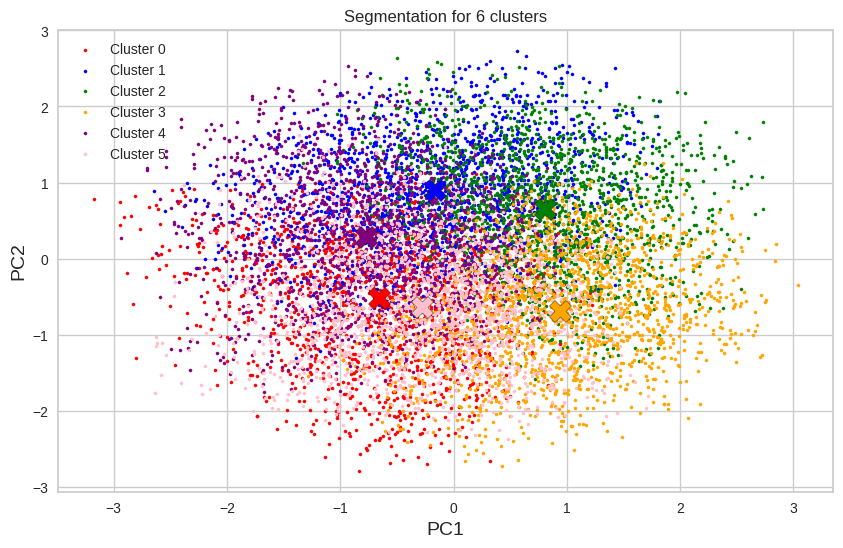

In [19]:
plot_clusters(df = scaled_features,k_value=6)